In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import fasttext
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#sidesõnad ja asesõnad
stopsõnad_uus = ['ja', 'ning', 'ega', 'ehk', 'või', 'aga', 'kuid', 'ent', 'vaid', 'et', 'kui', 'kuna', 'sest', 'kuni', 'kuigi', 
             'ehkki', 'nagu', 'saati', 'elik', 'justkui', 'otsekui', 'seni', 'siis', 'ka', 'nii', 'kas',
             'mina', 'ma', 'meie', 'me', 'sina', 'sa', 'teie', 'te', 'tema', 'ta', 'nemad', 'nad',
             'enese', 'enda', 'iseenese', 'iseenda', 'oma', 'üksteise', 'teineteise',
             'see', 'too', 'sama', 'seesama', 'toosama', 'teine', 'muu',
             'niisugune', 'samasugune', 'niisamasugune', 'selline', 'seesugune', 'säärane','säherdune', 
             'taoline', 'selletaoline', 'kes', 'mis', 'kumb', 'missugune', 'milline', 'misuke', 'mitu', 'mitmes', 'mitmendik',
             'ise', 'oma', 'iga', 'igaüks', 'igamees', 'kõik', 'mõlemad', 'kumbki', 'emb-kumb', 'kogu', 'terve',
             'keegi', 'miski', 'mingi', 'mingisugune', 'miskisugune', 'ükski', 'mitu', 'mitmes',
             'mõni', 'mõningane', 'paljud', 'üks', 'teine', 'oma', 'enese', 'enda', 'omaenese', 'omaenda', 'iseoma', 
             'iseenese', 'iseenda', 'emb', 'mõlema', 'palju', '-']

In [3]:
stop_tekst = []
with open("stop_s.txt", "r", encoding = 'utf8') as file:
    for line in file:
        #print(line.rstrip())
        stop_tekst.append(line.rstrip())

In [4]:
len(stop_tekst)

5001

In [5]:
# Veamaatriks (plot the confusion matrix)
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Segadusmaatriks',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normaliseeritud segadusmaatriks")
    else:
        print('Normaliseerimata segadusmaatriks')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    
    plt.ylabel('Tõeline märgend')
    plt.xlabel('Prognoositud märgend')

In [6]:
data = pd.read_excel('toofailid/DATA_TEKSTIKOGU_puhastatud.xlsx', engine='openpyxl')
print(data.shape)

(636, 55)


In [7]:
label = data['Lahendi liik'].to_list()
labels = data.iloc[:, 16].apply(lambda x: '__label__' + str(x))

In [8]:
data.insert(1, "label", labels)

In [9]:
pr = data['text_token'].to_list()

In [11]:
artiklid = []
for i in range(len(pr)):
    art = []
    for el in pr[i].split():
        #print(el)
        if el not in stop_tekst:
            #print(el)
            art.append(el)
        artikkel = ' '.join(art)
    artiklid.append(artikkel)

In [12]:
data['text_token_stop'] = artiklid

In [13]:
len(artiklid)

636

In [14]:
X = data['text_token_stop']
y = data['label']
train_df, test_df, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [15]:
train_df

31     kohus arutas põhjalikult fekaalidega määritud ...
427    kliendid leiavad swedbank võlgu nõudes arvesta...
610    poliitikud kahetsusväärseks olukorda tapa suur...
499    loo ilmumise postimehel tõenäoliselt kohtusse ...
105    patsient ilukliinikusse suurte ootustega juhtu...
                             ...                        
198    huvi tundma pärit keel ütlema väändu peipsiäär...
93     kolme sõbrannaga möödunud neljapäeva õhtul tal...
54     metsatöösturid lageraiete vajalikkusest jutlus...
356    tundub keskerakonnale iseenesestmõistetavaks e...
489    kohtulugu • eile tartu ringkonnakohtus toimunu...
Name: text_token_stop, Length: 508, dtype: object

In [16]:
# Treenimisandmestik tekstifaili
#train = train_df.to_list()
#train_label = y_train.to_list()
#tekstid = list(map(lambda x, y: x+ ' ' +y, train_label, train))
tekstid = list(map(lambda x, y: x+ ' ' +y, y_train, train_df))
textfile = open('train_tekst_stop.txt', "w", encoding = 'utf8')
for element in tekstid:
    textfile.write(element + "\n")
textfile.close()

In [17]:
# Testandmestik tekstifaili
#train = train_df.to_list()
#train_label = y_train.to_list()
#tekstid = list(map(lambda x, y: x+ ' ' +y, train_label, train))
tekstid = list(map(lambda x, y: x+ ' ' +y, y_test, test_df))
textfile = open('test_tekst_stop.txt', "w", encoding = 'utf8')
for element in tekstid:
    textfile.write(element + "\n")
textfile.close()

In [57]:
# tekst stoppsõnadeta
model1 = fasttext.train_supervised(input = 'train_tekst_stop.txt',
                                  epoch=25, 
                                  lr = 0.5,
                                  #wordNgrams=2,
                                  #loss='hs',
                                  #bucket=200000,
                                  dim = 300)

                        precision    recall  f1-score   support

       __label__tauniv       0.64      0.36      0.46        58
__label__õigeksmõistev       0.61      0.83      0.70        70

             micro avg       0.62      0.62      0.62       128
             macro avg       0.62      0.60      0.58       128
          weighted avg       0.62      0.62      0.59       128

Normaliseerimata segadusmaatriks


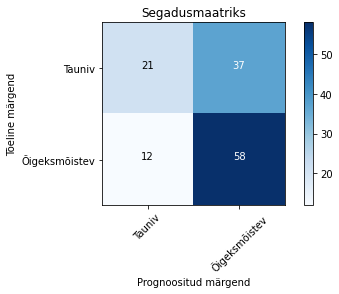

In [58]:
# Mudeli põhjal test-andmestiku väärtuste prognoosimine
y_pred1 = []
for t in test_df:
    ennustus = model1.predict(t)[0][0]
    y_pred1.append(ennustus)
print(classification_report(y_test, y_pred1))
cm = metrics.confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(cm, classes=['Tauniv', 'Õigeksmõistev'])

In [53]:
model2 = fasttext.train_supervised(input = 'train_tekst_stop.txt',
                                   dim = 300,
                                   lr = 0.5,
                                   epoch = 25,
                                   pretrainedVectors='cc.et.300.vec')

                        precision    recall  f1-score   support

       __label__tauniv       0.62      0.34      0.44        58
__label__õigeksmõistev       0.60      0.83      0.70        70

             micro avg       0.61      0.61      0.61       128
             macro avg       0.61      0.59      0.57       128
          weighted avg       0.61      0.61      0.58       128

Normaliseerimata segadusmaatriks


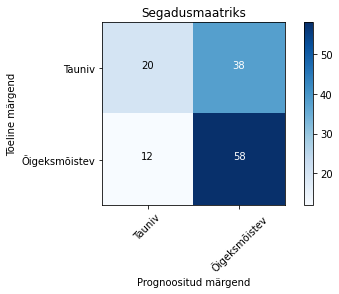

In [54]:
y_pred2 = []
for t in test_df:
    ennustus = model2.predict(t)[0][0]
    y_pred2.append(ennustus)
print(classification_report(y_test, y_pred2))
cm = metrics.confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(cm, classes=['Tauniv', 'Õigeksmõistev'])

In [55]:
model3 = fasttext.train_supervised(input = 'train_tekst_stop.txt',
                                  dim = 300,
                                  lr = 0.5,
                                  epoch = 25,
                                  pretrainedVectors='wiki.et.vec')

                        precision    recall  f1-score   support

       __label__tauniv       0.55      0.36      0.44        58
__label__õigeksmõistev       0.59      0.76      0.66        70

             micro avg       0.58      0.58      0.58       128
             macro avg       0.57      0.56      0.55       128
          weighted avg       0.57      0.58      0.56       128

Normaliseerimata segadusmaatriks


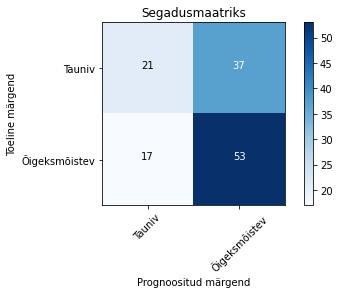

In [56]:
y_pred3 = []
for t in test_df:
    ennustus = model3.predict(t)[0][0]
    y_pred3.append(ennustus)
print(classification_report(y_test, y_pred3))
cm = metrics.confusion_matrix(y_test, y_pred3)
plot_confusion_matrix(cm, classes=['Tauniv', 'Õigeksmõistev'])